# Diabetes Prediction Model

## About Dataset
### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on


### Dataset
- Pregnancies :- Number of times a woman has been pregnant
- Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
- BloodPressure :- Diastollic Blood Pressure (mm hg)
- SkinThickness :- Triceps skin fold thickness(mm)
- Insulin :- 2 hour serum insulin(mu U/ml)
- BMI :- Body Mass Index ((weight in kg/height in m)^2)
- Age :- Age(years)
- DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
- Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)


## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

## Exploratory Data Analysis
### Understanding the dataset

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Conclusion** :- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

### Data Cleaning

In [7]:
data= data.drop_duplicates()

In [8]:
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


In [9]:
#replacing 0 values with median of that column
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean()) #normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean()) #normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median()) #skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median()) #skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median()) #skewed distribution

## Data Visualization

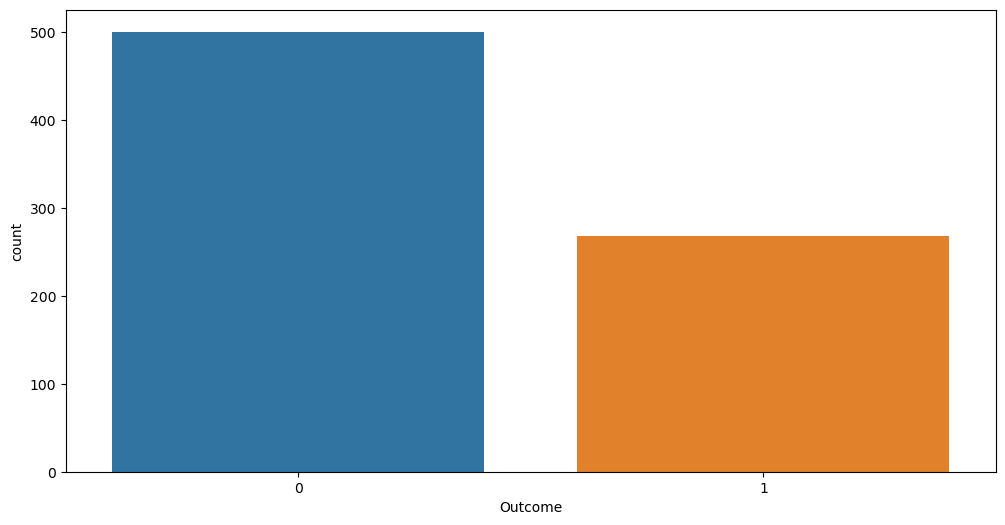

In [10]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Outcome', data = data)
plt.show()

**Conclusion** :- We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

### Observing outliers

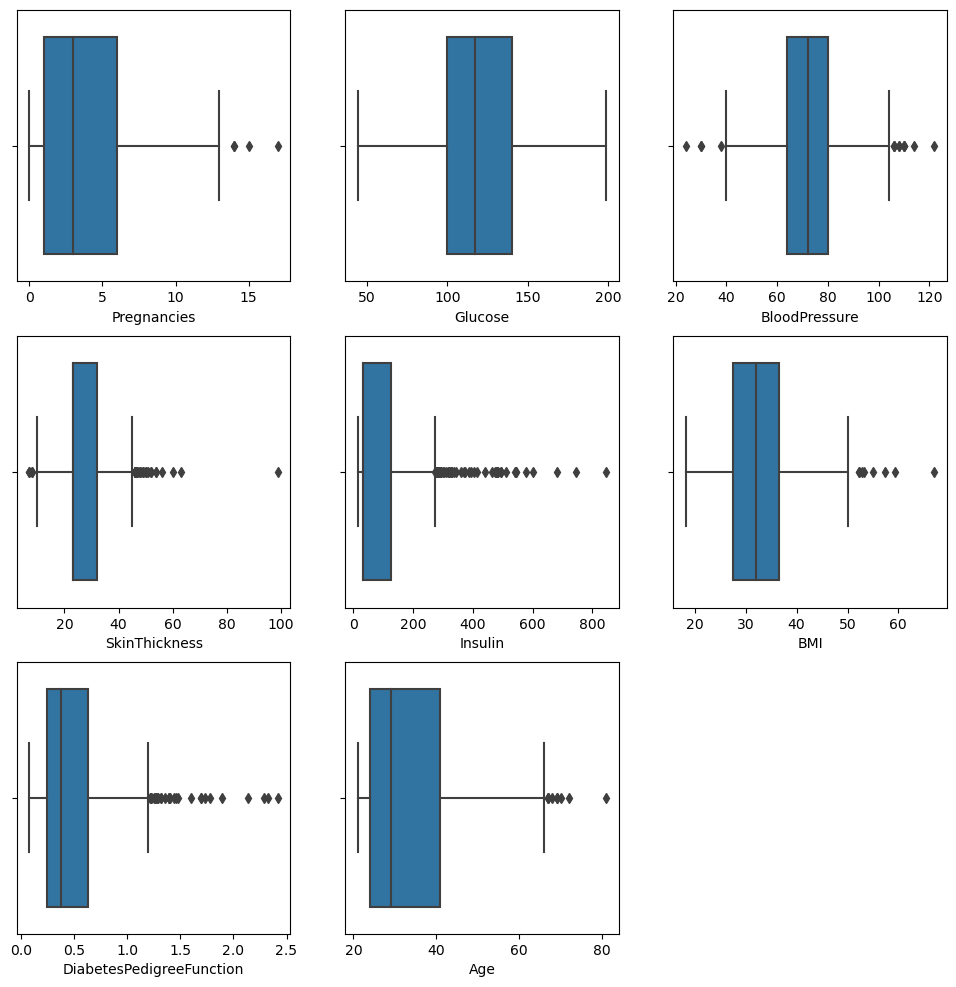

In [11]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = data)
plt.show()

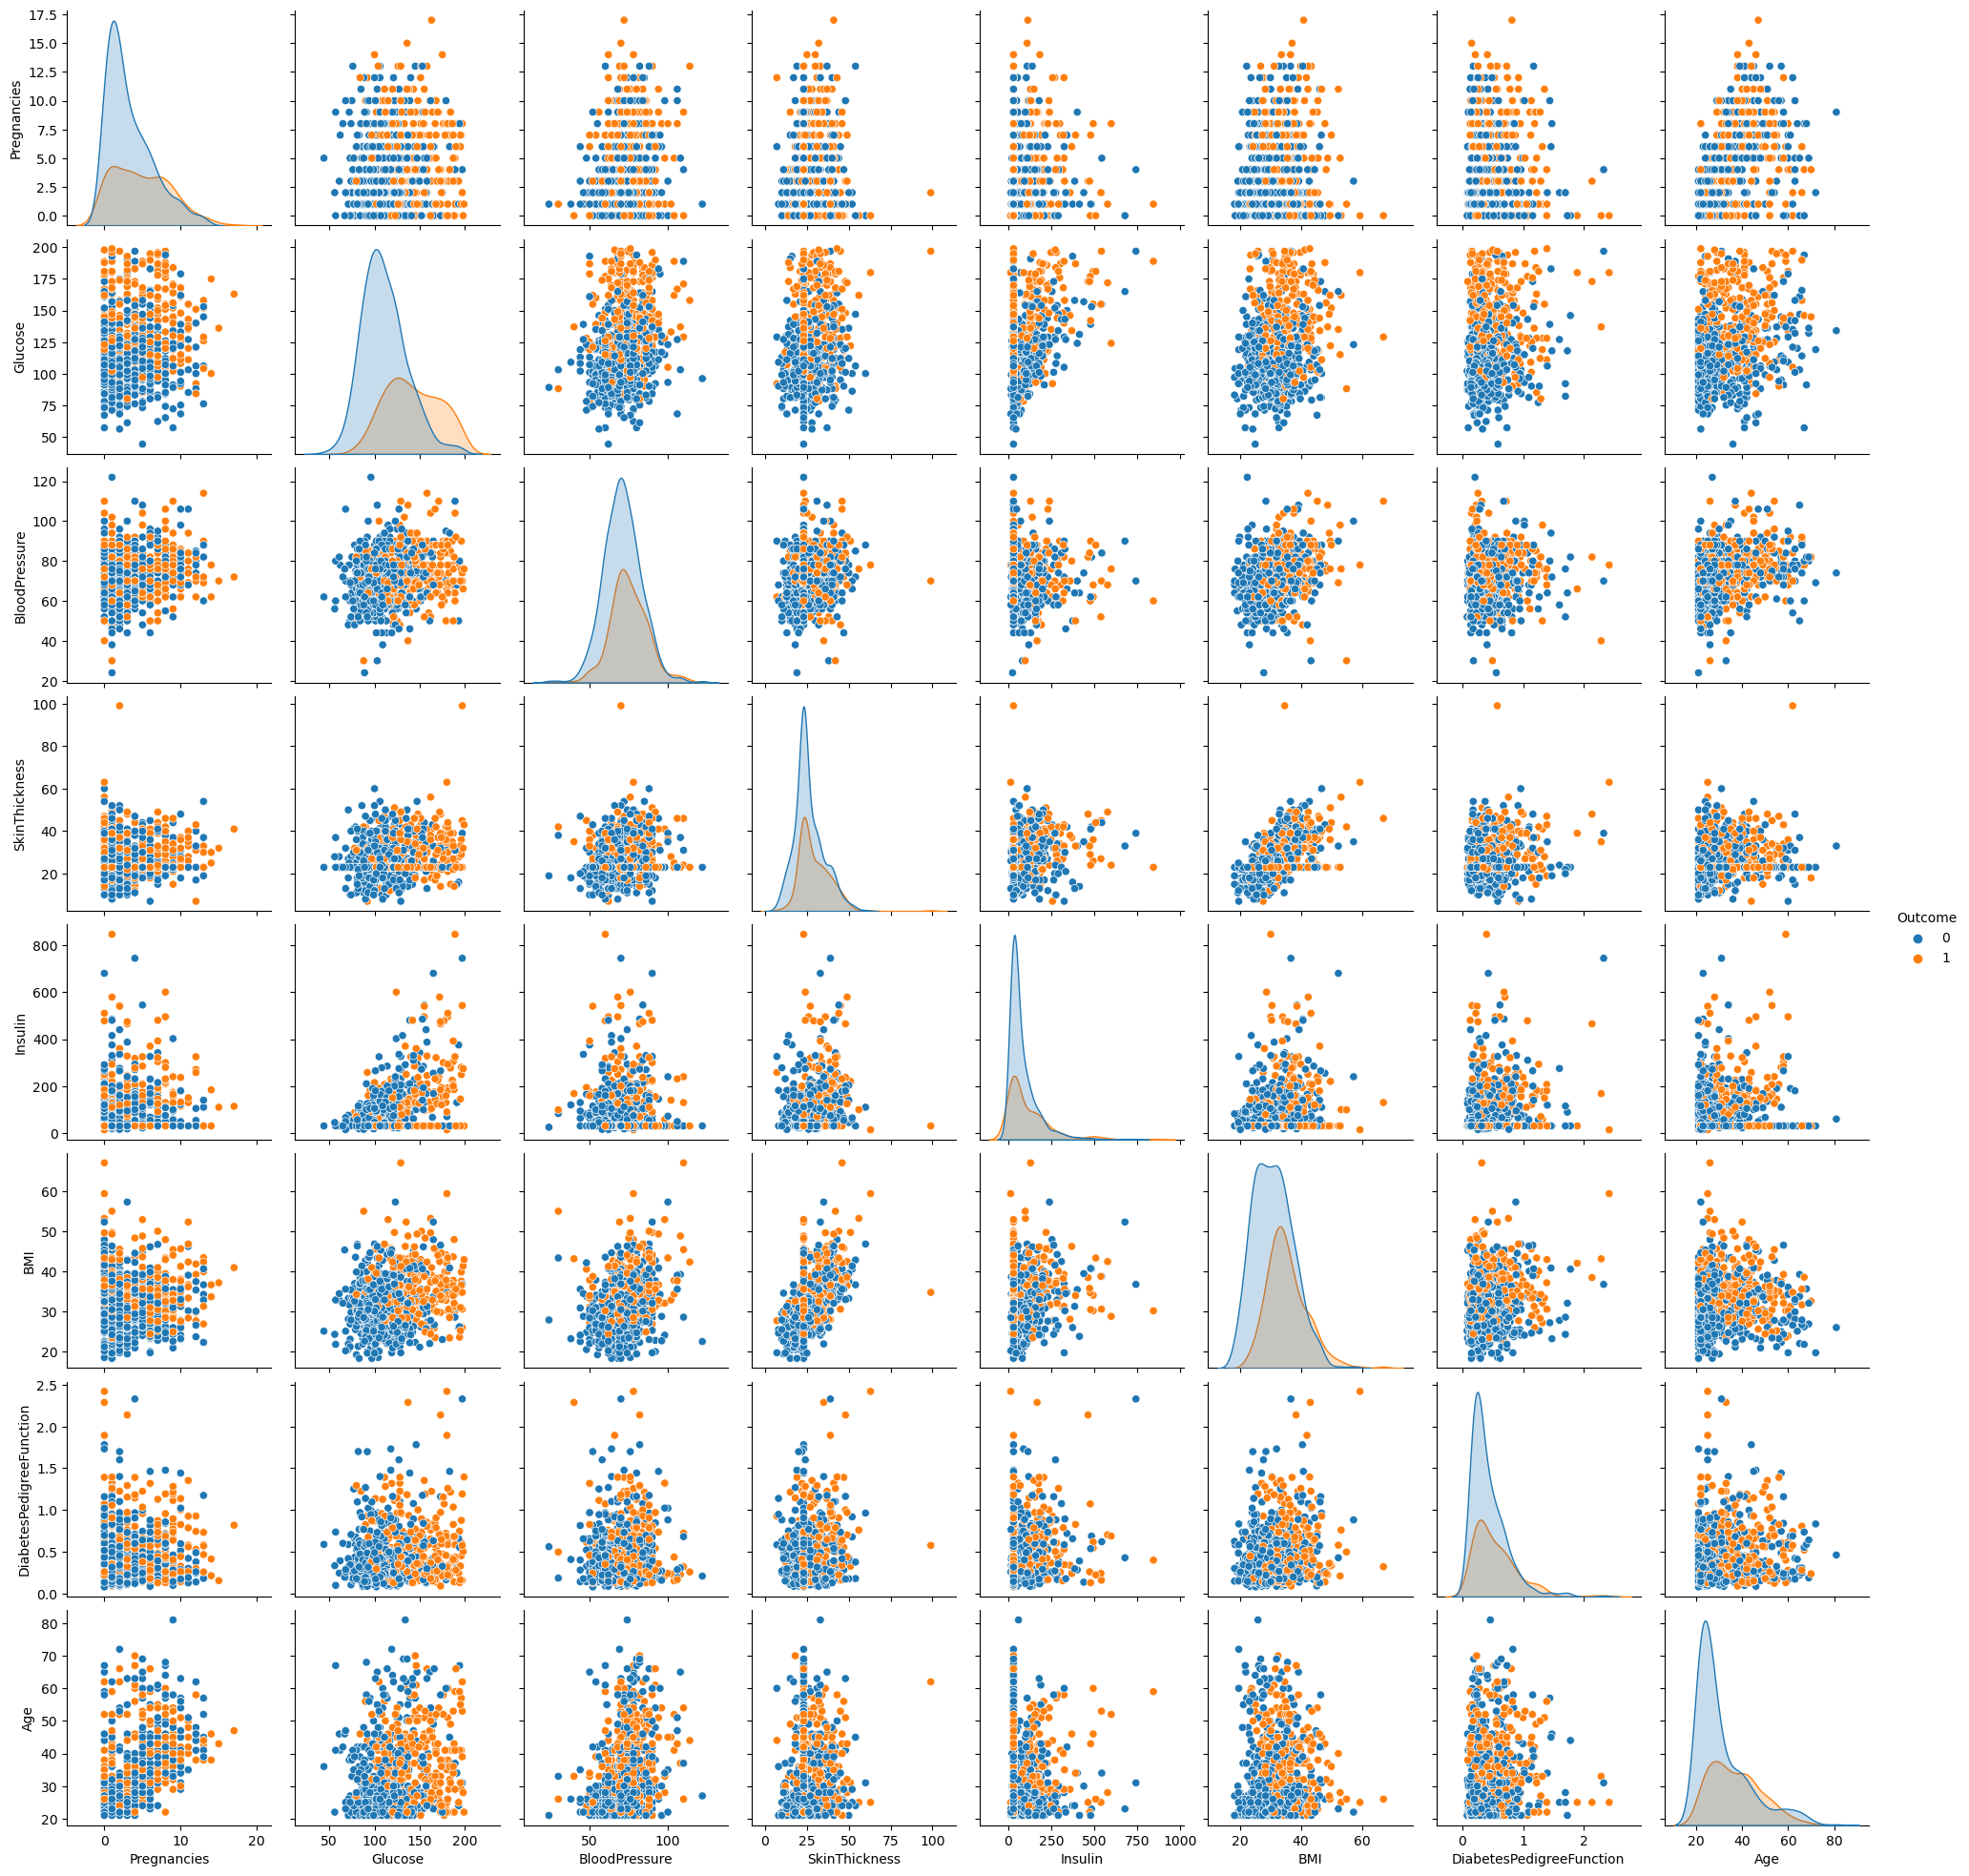

In [12]:
sns.pairplot(data, hue = 'Outcome')
plt.show()

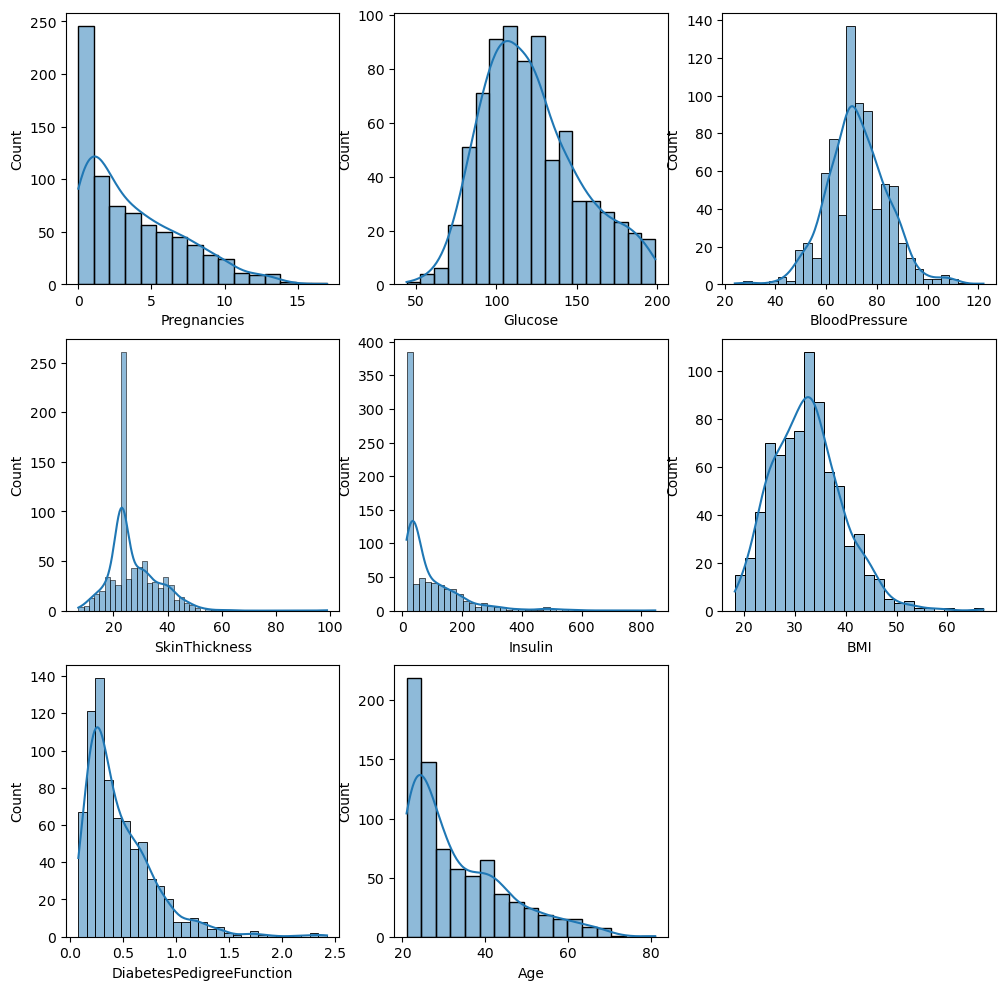

In [13]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data = data, kde = True)
plt.show()

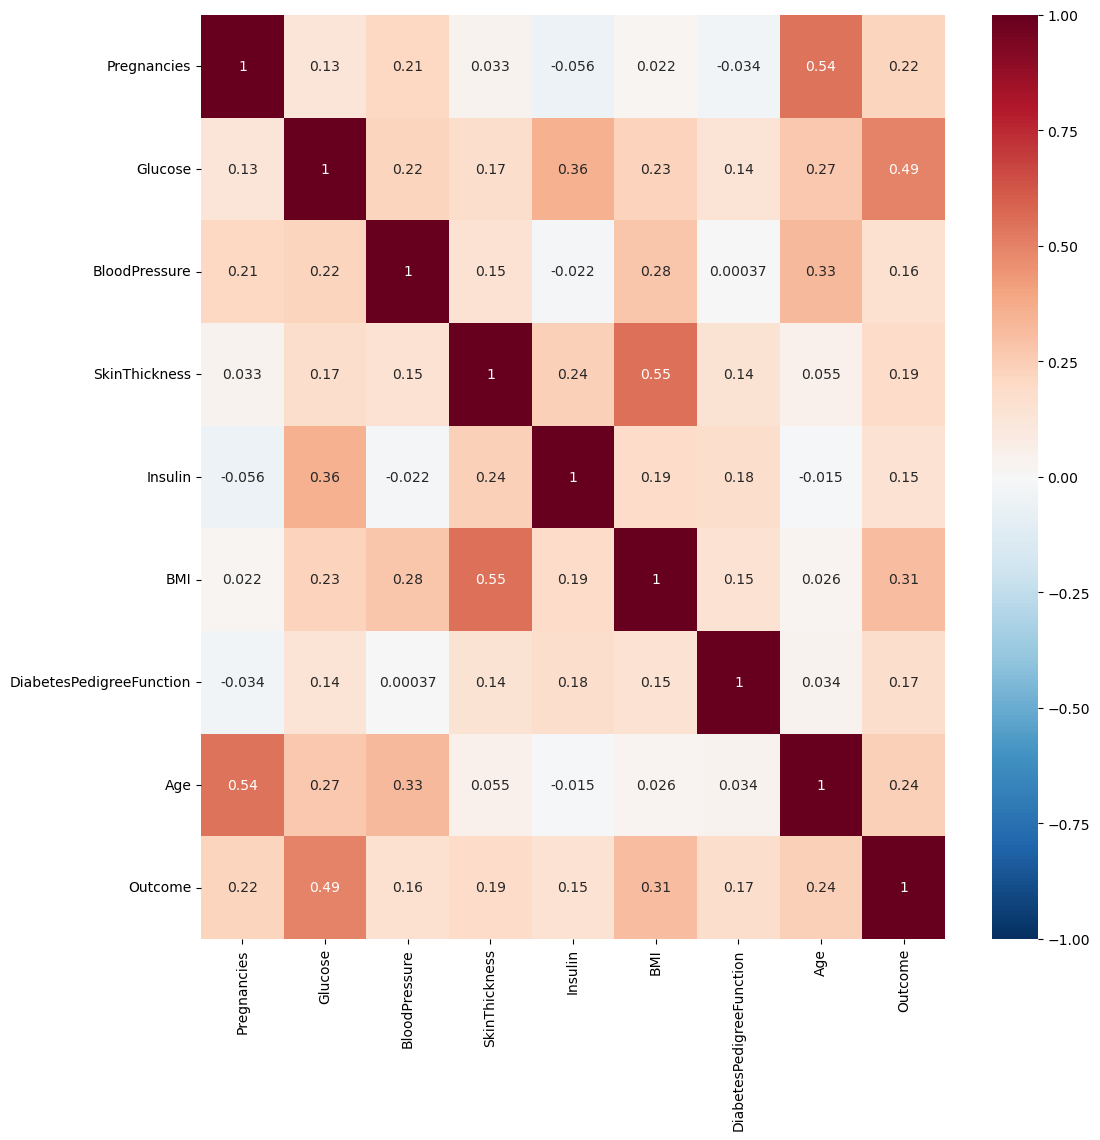

In [14]:
plt.figure(figsize= (12,12))
sns.heatmap(data.corr(), vmin = -1.0, center = 0, cmap = 'RdBu_r', annot = True)
plt.show()

## Standard Scaling and Label Encoding

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [16]:
X.head()Observing outliers
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = data)
plt.show()

sns.pairplot(data, hue = 'Outcome')
plt.show()

plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data = data, kde = True)
plt.show()

plt.figure(figsize= (12,12))
sns.heatmap(data.corr(), vmin = -1.0, center = 0, cmap = 'RdBu_r', annot = True)
plt.show()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.831114,0.695378,1.549885,5.484909,-0.020496


In [17]:
y = data['Outcome']

## Train Test Split
70% Train and 30% Test

In [18]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## K Nearest Neighbours
KNN algorithm, is a non-parametric algorithm that classifies data points based on their proximity and association to other available data.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [20]:
max_train_score = max(train_scores)
train_scores_index= [i for i, v in enumerate(train_scores) if v == max_train_score]
print("Max Train score {} % and k = {}".format(max_train_score*100, list(map(lambda x: x+1, train_scores_index))))

Max Train score 100.0 % and k = [1]


In [21]:
max_test_score = max(test_scores)
test_scores_index= [i for i, v in enumerate(test_scores) if v == max_test_score]
print("Max Test score {} % and k = {}".format(max_test_score*100, list(map(lambda x: x+1, test_scores_index))))

Max Test score 80.51948051948052 % and k = [13]


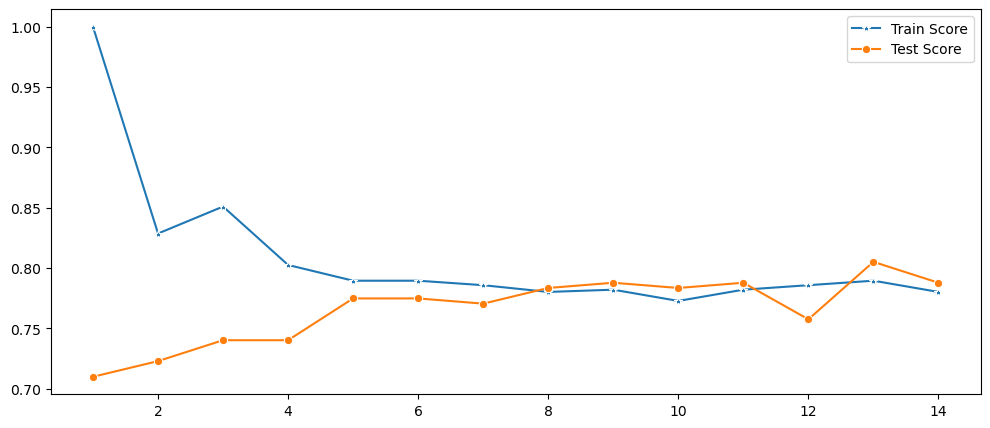

In [22]:
plt.figure(figsize=(12, 5))

p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')

plt.show()

In [23]:
knn = KNeighborsClassifier(13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8051948051948052

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[141,  16],
       [ 29,  45]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       157
           1       0.74      0.61      0.67        74

    accuracy                           0.81       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.80      0.81      0.80       231

